In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fertilizer.csv")

In [3]:
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


In [4]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [5]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

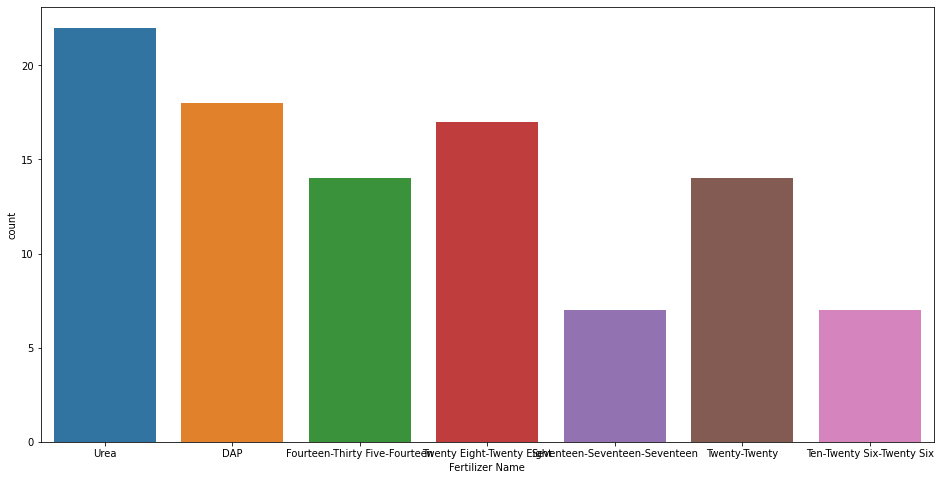

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

In [7]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train[0]

array([ 0.46072126, -0.57643157,  0.09092764])

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]


1.0

In [14]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
DAP,0
Fourteen-Thirty Five-Fourteen,1
Seventeen-Seventeen-Seventeen,2
Ten-Twenty Six-Twenty Six,3
Twenty Eight-Twenty Eight,4
Twenty-Twenty,5
Urea,6


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 3), y_train = (79,), x_test = (20, 3), y_test = (20,)


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Nitrogen     79 non-null     int64
 1   Potassium    79 non-null     int64
 2   Phosphorous  79 non-null     int64
dtypes: int64(3)
memory usage: 2.5 KB


In [17]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
pred_rand = rand.predict(x_test)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Best score :  0.9876543209876543
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [20]:
import pickle
pickle_out = open('classifier1.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [21]:
model = pickle.load(open('classifier1.pkl', 'rb'))
ans = model.predict([[12,10,13]])
if ans[0] == 0:
    print("TEN-TWENTY SIX-TWENTY SIX")
elif ans[0] == 1:
    print("Fourteen-Thirty Five-Fourteen")
elif ans[0] == 2:
    print("Seventeen-Seventeen-Seventeen")   
elif ans[0] == 3:
    print("TWENTY-TWENTY")
elif ans[0] == 4:
    print("TWENTY EIGHT-TWENTY EIGHT")
elif ans[0] == 5:
    print("DAP")
else:
    print("UREA")

Seventeen-Seventeen-Seventeen
